# Set Membership Coursework

In [1]:
import random
import string
import timeit
from bitarray import bitarray

## 1. Implementeation

### Sequential Search 

In [2]:
class SequentialSearchSet():
    
    def __init__(self):
        self.items = []           
        
    def insertElement(self, element):
        inserted = False
        if type(element) == str:
            self.items.append(element)
            inserted = True
        return inserted   

    def searchElement(self, element):
        found = False     
        for item1 in self.items:
            if item1 == element:
                found = True
                return found
        return found   

Time Complexity: 
- Insert an element is O(n^2)
- Search an element is O(n)

Space Complexity: 
- O(n)

### Binary Search Tree

In [3]:
class RecursiveNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def get(self, element):
        if self.value == element:
            return True
        elif element < self.value and self.left:
            return self.left.get(element)
        elif element > self.value and self.right:
            return self.right.get(element)
        return False

    def put(self, element):
        if self.value == None:
            self.value = element
            return True
        elif element == self.value:
            self.value = element
            return True
        elif element < self.value:
            if self.left is None:
                self.left = RecursiveNode(element)
                return True
            else: 
                return self.left.put(element)
        elif element > self.value:
            if self.right is None:
                self.right = RecursiveNode(element)
                return True
            else: 
                return self.right.put(element)
        return False

class IterativeNode:
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def get(self, element):
        current = self
        while current is not None:
            if current.value == element:
                return True
            elif element < current.value:
                current = current.left
            elif element > current.value:
                current = current.right
            else:
                print("Invalid Case")
        return False


    def put(self, element):
        if self.value == None:
            self.value = element
            return True
        
        current = self
        while current is not None:
            if element < current.value:
                if current.left is None:
                    current.left = IterativeNode(element)
                    return True
                else:
                    current = current.left

            elif element > current.value:
                if current.right is None:
                    current.right = IterativeNode(element)
                    return True
                else:
                    current = current.right

            elif element == current.value:
                current.value = element
                return True
            
            else:
                print("Invalid Case")


class BinarySearchTreeSet:
    
    def __init__(self):
        self.bst = IterativeNode(None)

    def insertElement(self, element):
        inserted = False
        inserted = self.bst.put(element) 
        return inserted

    def searchElement(self, element):     
        found = False 
        found = self.bst.get(element)
        return found

Time Complexity:

Insert: 
- Average: O(log n)
- Worst: O(n)

Search:
- Average: O(log n)
- Worst: O(n)

Space Complexity:
- O(n)

### Balanced Search Tree

In [4]:
class BalancedSearchTreeSet:
    R = True
    B = False
    # R refers to Red; B refers to Black
    
    class Nodes:
        def __init__(self, val, colour):
            self.val = val
            self.colour = colour
            self.left = None
            self.right = None
            
    def __init__(self):
        self.root = None
        
    def searchElement(self, element):
        found = False
        found = self.search(self.root, element)
        return found
    
    def search(self, node, val):
        if node is None:
            return False
        else:
            if node.val == val:
                return True
            elif node.val > val:
                return self.search(node.left, val)
            else:
                return self.search(node.right, val)
    
    def insertElement(self, element):
        inserted = False
        if self.root is None:
            self.root = self.Nodes(element, self.B)
            inserted = True
        else:
            self.root, inserted = self.insert(self.root, element)
            self.root.colour = self.B
        return inserted

    def insert(self, node, val):
        if node is None:
            return self.Nodes(val, self.R), True
        if val < node.val:
            node.left, inserted = self.insert(node.left, val)
        elif val > node.val:
            node.right, inserted = self.insert(node.right, val)
        else:
            # value already exists, do nothing
            return node, False

        # perform rotations and colour flips
        if self.isR(node.right) and not self.isR(node.left):
            node = self.leftRotate(node)
        if self.isR(node.left) and self.isR(node.left.left):
            node = self.rightRotate(node)
        if self.isR(node.left) and self.isR(node.right):
            self.flipColour(node)

        return node, inserted

    def isR(self, node):
        if node is None:
            return False
        return node.colour == self.R
    
    def leftRotate(self, node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = self.R
        return x
    
    def rightRotate(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = self.R
        return x
    
    def flipColour(self, node):
        node.colour = not node.colour
        node.left.colour = self.B
        node.right.colour = self.B

Time Complexity: 

- Insert an element is O(log n)
- Search an element is O(log n)

Space Complexity: 

- O(n)

### 2-3 Search Tree

In [5]:
class Node2:
    def __init__(self, values, parent = None):
        self.values = [values]
        self.parent = parent
        self.child = []
    
    def is_leaf(self):
        return len(self.child) == 0
    
    def __lt__(self, other):
        return self.values[0] < other.values[0]
    
    def add(self, new_node):
        for child in new_node.child:
            child.parent = self
        self.values.extend(new_node.values)
        self.values.sort()
        self.child.extend(new_node.child)
        if len(self.child)>1:
            self.child.sort()
        if len(self.values)>2:
            self.split()
    
    def _insert(self, new_node):
        if self.is_leaf() == True:
            if new_node.values[0] not in self.values:
                self.add(new_node)
                return True
            return False
        elif new_node.values[0] > self.values[-1]:
            return self.child[-1]._insert(new_node)
        else:
            for i in range(0, len(self.values)):
                if new_node.values[0] < self.values[i]:
                    return self.child[i]._insert(new_node)
                    
    
    def split(self):
        left_child = Node2(self.values[0], self)
        right_child = Node2(self.values[2], self)
        if len(self.child) != 0:
            self.child[0].parent = left_child
            self.child[1].parent = left_child
            self.child[2].parent = right_child
            self.child[3].parent = right_child
            left_child.child = [self.child[0], self.child[1]]
            right_child.child = [self.child[2], self.child[3]]
        
        #promote middle node
        self.child = [left_child]
        self.child.append(right_child)
        self.values = [self.values[1]]

        if self.parent is not None:
            if self in self.parent.child:
                self.parent.child.remove(self)
            self.parent.add(self)
        else:
            left_child.parent = self
            right_child.parent = self

    def _find(self, element):
        if element in self.values:
            return True
        elif self.is_leaf() == True:
            return False
        elif element > self.values[-1]:
            return self.child[-1]._find(element)
        else:
            for i in range (0, len(self.values)):
                if element < self.values[i]:
                    return self.child[i]._find(element)
        
class TwoThreeBSTSet:
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        inserted = False
        new_node = Node2(element)
        if self.root is None:
            self.root = new_node
        else:
            inserted = self.root._insert(new_node)
            if not inserted:
                return False
            #re-establishes the root to the top of the tree
            while self.root.parent is not None:
                self.root = self.root.parent
        return True 
    
    def searchElement(self, element):
        found = False
        found =self.root._find(element)
        return found

Time Complexity:
- Insert an element is O(log n)
- Search an element is O(log n)

Space Complexity:
- O(n)

### Bloom Filter

In [7]:
class BloomFilterSet:
    
    def __init__(self):
        self.HashFunctions = None
        self.hashNum = 0
        self.size = 0
        self.bitArray = None
    
    def initVariables(self, ItemNum, FPProb, HashFunctions):
        # ItemNum : int, Number of items expected to be stored in bloom filter
        # FPProb : float, False Positive probability in decimal
        # HashFunctions: list, number of hash functions to use
        self.HashFunctions = HashFunctions
        self.hashNum = len(HashFunctions)
        # Total size of bit array
        self.size = self.getSize(ItemNum, FPProb)
        # Bit array of given size, and initialize all bits as 0 (False)
        self.bitArray = bitarray(self.size)
        self.bitArray.setall(0)

    def insertElement(self, element):
        inserted = False
        tempIndex = []
        for function in self.HashFunctions:
            index = function(element) % self.size
            self.bitArray[index] = True
            tempIndex.append(self.bitArray[index])
        if False not in tempIndex:
            inserted = True
        return inserted

    def searchElement(self, element):
        found = False
        count = 0
        for function in self.HashFunctions:
            index = function(element) % self.size
            if not self.bitArray[index] == False:
                count += 1
            else:
                return found
        if count == len(self.HashFunctions):
            found = True
        return found

    def getSize(self, n, p):
        # m = -(n * lg(p)) / (lg(2)^2)
        # n : number of items expected to be stored in filter
        # p : False Positive probability in decimal
        m = -(n * self.myLog(p)) / (self.myLog(2) ** 2)
        return int(m)
    
    def myLog(self, n):
        if n <= 0:
            raise ValueError("logarithm is undefined for non-positive values")
        if n == 1:
            return 0
        if n < 1:
            # log(xn) = -log(1/n) for n < 1
            return -self.myLog(1 / n)
        # Use the taylor series approximation for log(n) where |n-1| < 1
        taylor = (n - 1) / float(n + 1)
        term = taylor
        total = taylor
        num = 1
        while abs(term) > 1e-15:
            num += 2
            term *= taylor * taylor / float(num * (num - 1))
            total += term
        return 2 * total

In [8]:
def builtinHash(string):
    return hash(string)

def bernsteinHash(string):
    hashValue = 5381
    for char in string:
        hashValue = ((hashValue << 5) + hashValue) + ord(char)
    return hashValue

def fnvHash(string):
    hashValue = 2166136261
    for char in string:
        hashValue = (hashValue * 16777619) ^ ord(char)
    return hashValue

def jenkinsHash(string):
    hashValue = 0
    for char in string:
        hashValue += ord(char)
        hashValue += (hashValue << 10)
        hashValue ^= (hashValue >> 6)
    hashValue += (hashValue << 3)
    hashValue ^= (hashValue >> 11)
    hashValue += (hashValue << 15)
    return hashValue

def djb2Hash(string):
    hashValue = 5381
    for char in string:
        hashValue = ((hashValue << 5) + hashValue) + ord(char)
    return hashValue

def sdbmHash(string):
    hashValue = 0
    for char in string:
        hashValue = ord(char) + (hashValue << 6) + (hashValue << 16) - hashValue
    return hashValue

def fnv1aHash(string):
    hashValue = 2166136261
    for char in string:
        hashValue ^= ord(char)
        hashValue *= 16777619
    return hashValue

In [9]:
Alphabets = list(string.ascii_letters)
randomword = []
for a in range(10000):
    temp = ''.join(random.choice(Alphabets) for t in range(random.randint(100, 200)))
    randomword.append(temp)

functions = [builtinHash, bernsteinHash, fnvHash, jenkinsHash, 
             djb2Hash, sdbmHash, fnv1aHash]
bf = BloomFilterSet()
bf.initVariables(10000, 0.01, functions)
testnum = 0
for ws in randomword:
    if bf.searchElement(ws) == True:
        testnum += 1

print("The False-Positive-Rate: ", testnum / len(randomword))

The False-Positive-Rate:  0.0


Time Complexity: 
- Creating the Bloom filter is O(kn)
- Insert and Search an element: O(k)
- k is the number of hash functions and n is the number of elements

Space Complexity: 
- O(kb), where k is the number of hash functions and b is the bits number

## 2. Experimentally Evaluation

### Using Real Data

In [10]:
def ReadFile(filepath):
    with open(filepath) as f:
        for line in f:
            words = line.strip().split()
    return words

In [11]:
words1 = ReadFile("./data/testfiles/test1-mobydick.txt")
words2 = ReadFile("./data/testfiles/test2-warpeace.txt")
words3 = ReadFile("./data/testfiles/test3-dickens.txt")

files = {"'test1-mobydick.txt'": words1, "'test2-warpeace.txt'": words2,
         "'test3-dickens.txt'": words3}
print(len(words1), len(words2), len(words3))

209329 564236 5149661


In [12]:
wordsforsearch = []
with open("./data/testfiles/test-search.txt") as fsearch:
    for line in fsearch:
        wordsforsearch.append(line.strip())
        
len(wordsforsearch)

544

In [13]:
hashFunctions = [builtinHash, bernsteinHash, fnvHash, jenkinsHash, 
                 djb2Hash, sdbmHash, fnv1aHash]

In [14]:
def CheckRes(reslist):
    return all(all(x == reslist[0][i] for x in lst) for i, lst in enumerate(zip(*reslist)))

#### The total amount of time of all insert operations

In [15]:
def InsertTime(classname, datadict):
    res = []
    classlist = []
    
    for key in datadict.keys():
        tempdata = datadict[key]
        algorithm = classname()
        if str(classname) == str(BloomFilterSet):
            algorithm.initVariables(len(tempdata), 0.01, hashFunctions)

        seen = {}
        InsertStart = timeit.default_timer()
        for word in tempdata:
            if word is not None and word not in seen:
                seen[word] = True
                inserted = algorithm.insertElement(word)
                res.append(inserted)
        InsertEnd = timeit.default_timer()
        InsertTime = InsertEnd - InsertStart
        print("Insert time taken for", key, "is :", InsertTime)
        classlist.append(algorithm)
    return classlist, res

In [38]:
# Sequential Search
SEQs, SeqInsertRes = InsertTime(SequentialSearchSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.0499312000010832
Insert time taken for 'test2-warpeace.txt' is : 0.1449376000000484
Insert time taken for 'test3-dickens.txt' is : 0.8519992000001366


In [39]:
# Binary Search Tree
BSTs, BstInsertRes = InsertTime(BinarySearchTreeSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.14003570000022592
Insert time taken for 'test2-warpeace.txt' is : 0.15579070000057982
Insert time taken for 'test3-dickens.txt' is : 1.3844753000012133


In [40]:
# Balanced Search Tree
RBTs, BalstInsertRes = InsertTime(BalancedSearchTreeSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.3975929999996879
Insert time taken for 'test2-warpeace.txt' is : 0.45641059999979916
Insert time taken for 'test3-dickens.txt' is : 2.6554304999990563


In [41]:
# Balanced Search Tree -- 2-3 Search Tree
TTSTs, TtstInsertRes = InsertTime(TwoThreeBSTSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.4201902999993763
Insert time taken for 'test2-warpeace.txt' is : 0.4309458000006998
Insert time taken for 'test3-dickens.txt' is : 2.628905300000042


In [42]:
# Bloom Filter
BFs, BfInsertRes = InsertTime(BloomFilterSet, files)

Insert time taken for 'test1-mobydick.txt' is : 0.38959819999945466
Insert time taken for 'test2-warpeace.txt' is : 0.39845950000017183
Insert time taken for 'test3-dickens.txt' is : 2.530947899998864


In [46]:
RealInsertList = [SeqInsertRes, BstInsertRes, BalstInsertRes, TtstInsertRes, BfInsertRes]
RealInsertRes = CheckRes(RealInsertList)
RealInsertRes

True

#### The total amount of time of search operations

In [19]:
def SearchTime(objects, searchdata):
    res = []
    for obj in objects:
        tempres = []
        SearchStart = timeit.default_timer()
        for ws in searchdata:
            if ws is not None:
                searched = obj.searchElement(ws)
            else:
                searched = None
            tempres.append(searched)
        SearchEnd = timeit.default_timer()
        SearchTime = SearchEnd - SearchStart
        print("Search time taken for 'test-search.txt' in file", 
              objects.index(obj)+1, "is :", SearchTime)
        res.append(tempres)
    return res

In [47]:
# Sequential Search Tree
SeqSearchRes = SearchTime(SEQs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.1568704000001162
Search time taken for 'test-search.txt' in file 2 is : 0.14104700000098092
Search time taken for 'test-search.txt' in file 3 is : 0.43964100000084727


In [48]:
# Binary Search Tree
BstSearchRes = SearchTime(BSTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.0018952999998873565
Search time taken for 'test-search.txt' in file 2 is : 0.0018098000000463799
Search time taken for 'test-search.txt' in file 3 is : 0.0024544999996578554


In [49]:
# Balanced Search Tree
BalstSearchRes = SearchTime(RBTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.004823999999644002
Search time taken for 'test-search.txt' in file 2 is : 0.0022506999994220678
Search time taken for 'test-search.txt' in file 3 is : 0.002798800000164192


In [50]:
# Balanced Search Tree -- 2-3 Search Tree
TtstSearchRes = SearchTime(TTSTs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.005796399998871493
Search time taken for 'test-search.txt' in file 2 is : 0.004568599999402068
Search time taken for 'test-search.txt' in file 3 is : 0.005525499998839223


In [51]:
# Bloom Filter
BfSearchRes = SearchTime(BFs, wordsforsearch)

Search time taken for 'test-search.txt' in file 1 is : 0.004960299998856499
Search time taken for 'test-search.txt' in file 2 is : 0.005392199998823344
Search time taken for 'test-search.txt' in file 3 is : 0.006221499999810476


In [52]:
RealSearchList = [SeqSearchRes, BstSearchRes, BalstSearchRes, TtstSearchRes, BfSearchRes]
RealSearchRes = CheckRes(RealSearchList)
RealSearchRes

True

### Using Synthetic Data

### different conditions:
- Duplicate cases
- Longer String length
- Adding numbers and symbols in each string
- String list in ascending/descending order
- Missing values
- ......

In [109]:
class TestDataGenerator():

    def __init__(self):
        self.syntheticData = []
        self.strLen = 0
        self.percentage = 0.0

    def setParams(self, strLen, percentage):
        self.strLen = strLen
        self.percentage = percentage
    
    def generateData(self, size):
        data, data1, data2 = [], [], []
        seen1, seen2, seen3 = {}, {}, {}
        alphabets = list(string.ascii_letters)
        charlist = string.printable

        # Normal Case
        while len(data) < size:
            temp = ''.join(random.choice(alphabets) for _ in range(random.randint(4, 10)))
            if temp not in seen1:
                seen1[temp] = True
                data.append(temp)

        # Long String
        while len(data1) < size:
            temp1 = ''.join(random.choice(alphabets) for _ in range(self.strLen))
            if temp1 not in seen2:
                seen2[temp1] = True
                data1.append(temp1)

        # Special String
        while len(data2) < size:
            temp2 = ''.join(random.sample(charlist, random.randint(4, 10)))
            if temp2 not in seen3:
                seen3[temp2] = True
                data2.append(temp2)

        # Ascending Order
        data3 = self.mergeSort(data.copy())
        
        # Descending Order
        data4 = data3[::-1]

        # String with missing values and duplicate values
        num6 = round(size * 0.2)
        temp6 = data[ : num6]
        data5 = [None if i >= num6 and random.random() < self.percentage else data[i] for i in range(size)]
        data6 = [random.choice(temp6) if i >= num6 and random.random() < self.percentage else data[i] for i in range(size)]

        # Strings of distinct integers
        data7 = []
        for _ in range(size):
            data7.append(str(random.randint(-2147483648, 2147483647)))

        # Strings of distinct floats between 0.0 and 1.0
        data8 = []
        for _ in range(size):
            data8.append(str(random.uniform(0.0, 1.0)))

        # Strings contain whitespace
        data9 = data.copy()
        for i in range(size):
            current = data9[i]
            for _ in range(random.randint(1,10)):
                index = random.choice(range(0,len(current)))
                current = current[:index] + " " + current[index+1:]
            data9[i] = current

        # Palindrome strings
        data10 = data.copy()
        for i in range(len(data10)):
            tempword = data10[i][:len(data10[i])//2+1]
            data10[i] = tempword + tempword[::-1]

        
        self.syntheticData.append(data)
        self.syntheticData.append(data1)
        self.syntheticData.append(data2)
        self.syntheticData.append(data3)
        self.syntheticData.append(data4)
        self.syntheticData.append(data5)
        self.syntheticData.append(data6)
        self.syntheticData.append(data7)
        self.syntheticData.append(data8)
        self.syntheticData.append(data9)
        self.syntheticData.append(data10)

        return self.syntheticData

    def mergeSort(self, arr):
        n = len(arr)
        size = 1
        while size < n:
            for i in range(0, n, 2*size):
                left = arr[i : i+size]
                right = arr[i+size : i+2*size]
                merged = []
                l = r = 0
                while l < len(left) and r < len(right):
                    if left[l] < right[r]:
                        merged.append(left[l])
                        l += 1
                    else:
                        merged.append(right[r])
                        r += 1
                merged += left[l:]
                merged += right[r:]
                arr[i : i+len(merged)] = merged
            size *= 2
        return arr

In [110]:
datasize = 100000

dataGenerate = TestDataGenerator()
dataGenerate.setParams(100, 0.6)
SyntheticDataList = dataGenerate.generateData(datasize)
# SyntheticDataList

In [103]:
len(SyntheticDataList)

11

In [29]:
SyntheticDataNames = ["Normal", "Long String", "Special String", "Ascending Order", "Descending Order", 
                      "String with missing values", "String with duplicate values",
                     "Strings of distinct integers","Strings of distinct floats",
                      "Strings contain whitespace","Palindrome strings"]

In [111]:
synSearchList = []
for datalist in SyntheticDataList:
    num = round(len(datalist) * 0.3)
    templist = []
    seen = {}
    # Choose from list
    while len(templist) < num:
        tempdata = random.choice(datalist)
        if tempdata not in seen:
            seen[tempdata] = True
            templist.append(tempdata)
    # Generate new values
    falsenum = round(len(datalist) * 0.2)
    for _ in range(falsenum):
        fdata = ''.join(random.choice(string.ascii_lowercase) for _ in range(random.randint(8, 12))) 
        templist.append(fdata)
    synSearchList.append(templist)

# synSearchList

#### Insert Time Taken

In [31]:
def InsertTime2(classname, datalist):
    # Remove Duplicates
    seen = {}
    uniqueDatas = []
    for e in datalist:
        if e not in seen:
            seen[e] = True
            uniqueDatas.append(e)
    
    algorithm = classname()
    if str(classname) == str(BloomFilterSet):
        algorithm.initVariables(len(datalist), 0.01, hashFunctions)

    InsertStart = timeit.default_timer()
    res = []
    for word in uniqueDatas:
        # Remove Missing Values
        if word is not None:
            inserted = algorithm.insertElement(word)
            res.append(inserted)
    InsertEnd = timeit.default_timer()
    InsertTime = InsertEnd - InsertStart
    print("Insert time taken is :", InsertTime)
    return algorithm, res

In [32]:
SEQSyn, BSTSyn, RBTSyn, TTSTSyn, BTSyn = [], [], [], [], []
InsertRes1, InsertRes2, InsertRes3, InsertRes4, InsertRes5 = [], [], [], [], []
for i in range(len(SyntheticDataList)):
    print("For", SyntheticDataNames[i], "Case: ")
    print("Sequential Search: ")
    SEQ, res1 = InsertTime2(SequentialSearchSet, SyntheticDataList[i])
    SEQSyn.append(SEQ)
    InsertRes1.append(res1)
    print("Binary Search Tree: ")
    BST, res2 = InsertTime2(BinarySearchTreeSet, SyntheticDataList[i])
    BSTSyn.append(BST)
    InsertRes2.append(res2)
    print("Balanced Search Tree: ")
    RBT, res3 = InsertTime2(BalancedSearchTreeSet, SyntheticDataList[i])
    RBTSyn.append(RBT)
    InsertRes3.append(res3)
    print("2-3 Search Tree: ")
    TTST, res4 = InsertTime2(TwoThreeBSTSet, SyntheticDataList[i])
    TTSTSyn.append(TTST)
    InsertRes4.append(res4)
    print("Bloom Filter: ")
    BT, res5 = InsertTime2(BloomFilterSet, SyntheticDataList[i])
    BTSyn.append(BT)
    InsertRes5.append(res5)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

For Normal Case: 
Sequential Search: 
Insert time taken is : 0.040285199999971155
Binary Search Tree: 
Insert time taken is : 0.6117741000000478
Balanced Search Tree: 
Insert time taken is : 2.790596800000003
2-3 Search Tree: 
Insert time taken is : 3.190193200000067
Bloom Filter: 
Insert time taken is : 1.3974172999999155
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Long String Case: 
Sequential Search: 
Insert time taken is : 0.05140299999993658
Binary Search Tree: 
Insert time taken is : 0.6529166000000259
Balanced Search Tree: 
Insert time taken is : 3.6607632000000194
2-3 Search Tree: 
Insert time taken is : 3.145783900000083
Bloom Filter: 
Insert time taken is : 17.75568779999992
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
For Special String Case: 
Sequential Search: 
Insert time taken is : 0.03264310000008663
Binary Search Tree: 
Insert time taken is : 0.5812082999999575
Balanced Search Tree: 
Insert time taken is : 3.541886100000056
2-3 Search Tree: 
Insert time 

In [55]:
SyntheicInsertResS = []
for i in range(len(SyntheticDataList)):
    SyntheicInsertList = [InsertRes1[i], InsertRes2[i], InsertRes3[i], InsertRes4[i], 
                          InsertRes5[i]]
    SyntheicInsertRes = CheckRes(SyntheicInsertList)
    SyntheicInsertResS.append(SyntheicInsertRes)
SyntheicInsertResS

[True, True, True, True, True, True, True, True, True, True, True, True]

### Search Time Taken

In [34]:
def SearchTime2(obj, searchdata):
    res = []
    SearchStart = timeit.default_timer()
    for ws in searchdata:
        if ws is not None:
            searched = obj.searchElement(ws)
        else:
            searched = None
        res.append(searched)
    SearchEnd = timeit.default_timer()
    SearchTime = SearchEnd - SearchStart
    print("Search time taken is :", SearchTime)
    return res

In [35]:
SearchRes1, SearchRes2, SearchRes3, SearchRes4, SearchRes5 = [], [], [], [], []
for i in range (len(synSearchList)):
    print("For", SyntheticDataNames[i], "Case: ")
    print("Sequential Search: ")
    sres1 = SearchTime2(SEQSyn[i], synSearchList[i])
    SearchRes1.append(sres1)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Binary Search Tree: ")
    sres2 = SearchTime2(BSTSyn[i], synSearchList[i])
    SearchRes2.append(sres2)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Balanced Search Tree: ")
    sres3 = SearchTime2(RBTSyn[i], synSearchList[i])
    SearchRes3.append(sres3)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    sres4 = SearchTime2(RBTSyn[i], synSearchList[i])
    SearchRes4.append(sres4)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Bloom Filter: ")
    sres5 = SearchTime2(BTSyn[i], synSearchList[i])
    SearchRes5.append(sres5)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("                                                 ")

For Normal Case: 
Sequential Search: 
Search time taken is : 111.79107310000018
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Binary Search Tree: 
Search time taken is : 0.25719980000030773
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Balanced Search Tree: 
Search time taken is : 0.2713260000000446
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Search time taken is : 0.27210290000039095
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Bloom Filter: 
Search time taken is : 0.4957926999995834
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                                 
For Long String Case: 
Sequential Search: 
Search time taken is : 119.85164350000014
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Binary Search Tree: 
Search time taken is : 0.2536826999994446
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Balanced Search Tree: 
Search time taken is : 0.2770061999999598
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Search time taken is : 0.271

In [56]:
SyntheicSearchResS = []
for i in range(len(SyntheticDataList)):
    SyntheicSearchList = [SearchRes1[i], SearchRes2[i], SearchRes3[i], SearchRes4[i], 
                          SearchRes5[i]]
    SyntheicSearchRes = CheckRes(SyntheicSearchList)
    SyntheicSearchResS.append(SyntheicSearchRes)
SyntheicSearchResS

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [112]:
SyntheicSearchResS = []
for i in range(len(SyntheticDataList)):
    SyntheicSearchList = [SearchRes1[i], SearchRes2[i], SearchRes3[i], SearchRes4[i], 
                          SearchRes5[i]]
    for j in range(1, len(SyntheicSearchList)):
        for k in range(len(SyntheicSearchList[j])):
            if SyntheicSearchList[j][k] != SearchRes1[i][k]:
                SyntheicSearchResS.append([False, j, k])
# SyntheicSearchResS

In [70]:
print("The False-Positive-Rate of Bllom Filter in Syntheic Data:", 
      len(SyntheicSearchResS) / (datasize * len(SyntheticDataList)))

The False-Positive-Rate of Bllom Filter in Syntheic Data: 0.018873333333333332


## Visualization

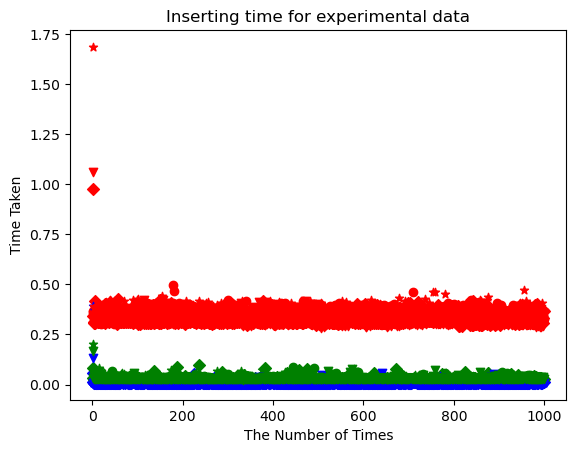

In [18]:
# experimental  data 
# inserting function
# seperating different files -- same colour points to same file, same symbol points to same Searching Algorithm
# circles -- SQS    diamonds -- BST    stars -- RBT     triangle down -- BF
# blue -- word1    green -- word2    red -- word3

import numpy as np
import pylab as pb

scatterPlotI = pb.subplot(111)
scatterPlotI.set_xlabel('The Number of Times')
scatterPlotI.set_ylabel('Time Taken')
scatterPlotI.set_title('Inserting time for experimental data')


def plotOfInserting(classname, datadict, marker):
    classlist = []
    
    for key in datadict.keys():
        tempdata = datadict[key]
        algorithm = classname()
        if str(classname) == str(BloomFilterSet):
            algorithm.initVariables(len(tempdata), 0.01, hashFunctions)
        
        aryx = np.array([])
        aryy = np.array([])
        
        seen = {}
        i = 1
        if key == "'test1-mobydick.txt'":
            for _ in range(999):
                aryx = np.append(aryx,i)
                i += 1
                InsertStart = timeit.default_timer()
                for word in tempdata:
                    if word is not None and word not in seen:
                        seen[word] = True
                        inserted = algorithm.insertElement(word)
                InsertEnd = timeit.default_timer()
                InsertTime = InsertEnd - InsertStart
                aryy = np.append(aryy,InsertTime)
            scatterPlotI.scatter(aryx,aryy,c='b',marker=marker)

        if key == "'test2-warpeace.txt'":
            for _ in range(999):
                aryx = np.append(aryx,i)
                i += 1
                InsertStart = timeit.default_timer()
                for word in tempdata:
                    if word is not None and word not in seen:
                        seen[word] = True
                        inserted = algorithm.insertElement(word)
                InsertEnd = timeit.default_timer()
                InsertTime = InsertEnd - InsertStart
                aryy = np.append(aryy,InsertTime)
            scatterPlotI.scatter(aryx,aryy,c='g',marker=marker)

        if key == "'test3-dickens.txt'":
            for _ in range(999):
                aryx = np.append(aryx,i)
                i += 1
                InsertStart = timeit.default_timer()
                for word in tempdata:
                    if word is not None and word not in seen:
                        seen[word] = True
                        inserted = algorithm.insertElement(word)
                InsertEnd = timeit.default_timer()
                InsertTime = InsertEnd - InsertStart
                aryy = np.append(aryy,InsertTime)
            scatterPlotI.scatter(aryx,aryy,c='r',marker=marker)

    classlist.append(algorithm)
    return classlist

SQSs = plotOfInserting(SequentialSearchSet, files, 'o')
BSTs = plotOfInserting(BinarySearchTreeSet, files, 'D')
RBTs = plotOfInserting(BalancedSearchTreeSet, files, '*')
BFs = plotOfInserting(BloomFilterSet, files, 'v')